# Salary Prediction

In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split   
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error

In [2]:
#Load the dataset into a pandas DataFrame
df=pd.read_csv(r"C:\Users\chitt\OneDrive\Desktop\Employee_Salary_Dataset.csv")
df

,ID,Experience_Years,Age,Gender,Salary
0,1,5,28,Female,250000
1,2,1,21,Male,50000
2,3,3,23,Female,170000
3,4,2,22,Male,25000
4,5,1,17,Male,10000
5,6,25,62,Male,5001000
6,7,19,54,Female,800000
7,8,2,21,Female,9000
8,9,10,36,Female,61500
9,10,15,54,Female,650000


In [3]:
# we can view the first 5 rows using head function
df.head()

,ID,Experience_Years,Age,Gender,Salary
0,1,5,28,Female,250000
1,2,1,21,Male,50000
2,3,3,23,Female,170000
3,4,2,22,Male,25000
4,5,1,17,Male,10000


In [4]:
#we can view the last 5 rows using tail function
df.tail()

,ID,Experience_Years,Age,Gender,Salary
30,31,10,34,Male,80000
31,32,15,54,Male,900000
32,33,20,55,Female,1540000
33,34,19,53,Female,9300000
34,35,16,49,Male,7600000


In [5]:
# View the shape of the dataset (number of rows, number of columns)
df.shape

(35, 5)

In [6]:
# checking for null values
df.isnull().sum()

ID                  0
Experience_Years    0
Age                 0
Gender              0
Salary              0
dtype: int64

In [7]:
# checking for duplicated values
df.duplicated().sum()

0

In [8]:
# data types of each column
df.dtypes

ID                   int64
Experience_Years     int64
Age                  int64
Gender              object
Salary               int64
dtype: object

In [9]:
# summery statistics of the dataset
df.describe()

,ID,Experience_Years,Age,Salary
count,35.000000,35.00000,35.000000,3.500000e+01
mean,18.000000,9.20000,35.485714,2.059147e+06
std,10.246951,7.55295,14.643552,3.170124e+06
min,1.000000,1.00000,17.000000,3.000000e+03
25%,9.500000,2.50000,22.500000,2.250000e+04
50%,18.000000,6.00000,29.000000,2.500000e+05
75%,26.500000,15.00000,53.500000,3.270000e+06
max,35.000000,27.00000,62.000000,1.000000e+07


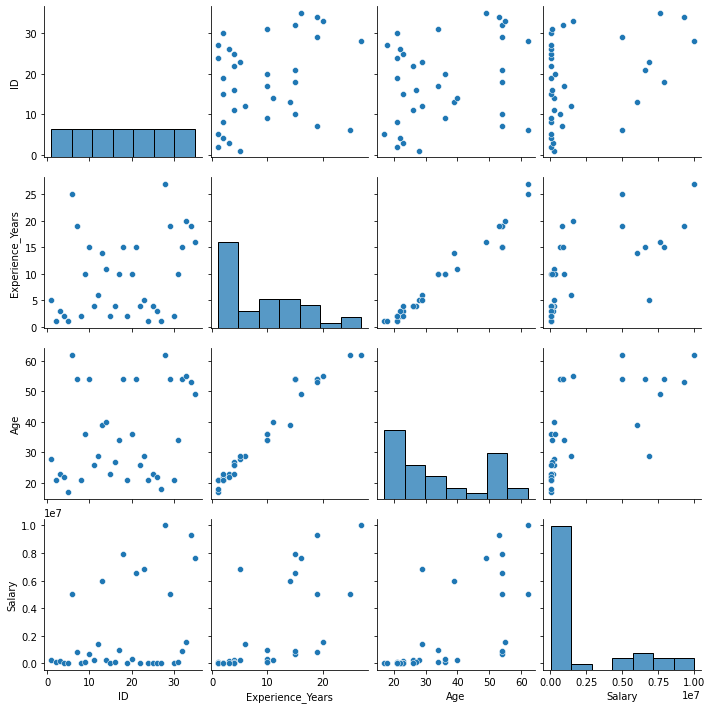

In [10]:
#visualizing data
sns.pairplot(data=df)
plt.show()

C:\Users\chitt\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


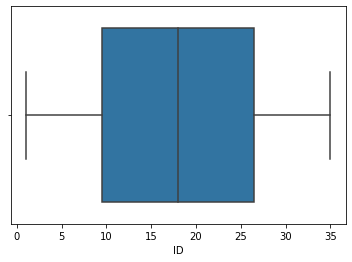

C:\Users\chitt\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


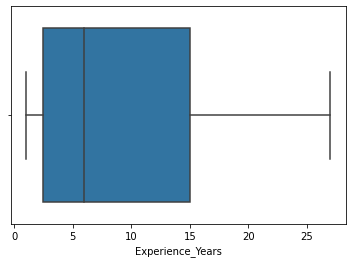

C:\Users\chitt\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


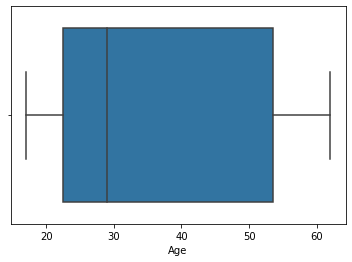

C:\Users\chitt\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


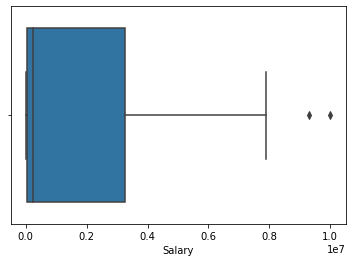

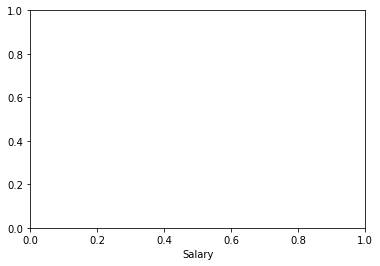

In [11]:
# Check for outliers or extreme values
for col in df.select_dtypes(include=['int', 'float']):
    sns.boxplot(df[col]) 
    plt.show()
    plt.xlabel(col)

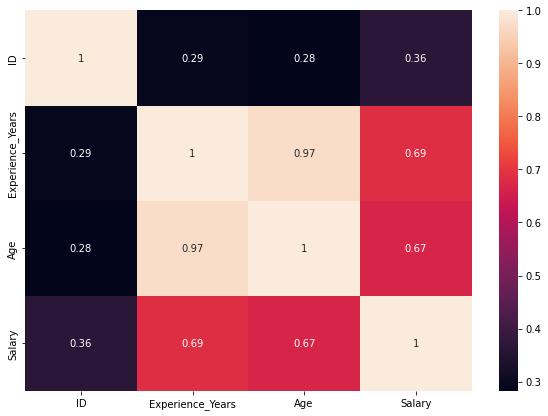

In [12]:
#correlation analysis
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),annot=True)
plt.show()

# Model Building using Linear Regression

In [29]:
from sklearn.preprocessing import LabelEncoder

In [30]:
le = LabelEncoder()
df['Category_Encoded'] = le.fit_transform(df['Gender'])

In [31]:
#Splitting the dataset

X=df.drop(["Salary"],axis=1)
Y=df["Salary"]

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.4,random_state=1)

In [32]:
# fitting the model using Linear regression
Lr=LinearRegression()
Lr.fit(X_train,Y_train)

ValueError: could not convert string to float: 'Female'

In [27]:
Y_pred = Lr.predict(X_test)

In [28]:
#we can evaluate the performance of the model using the accuracy_score function
accu1=r2_score(Y_test,Y_pred)
accu2=mean_absolute_error(Y_test,Y_pred)
accu3=mean_squared_error(Y_test,Y_pred)
accu3=np.sqrt(accu3)
print("R2:",accu1)
print("MAE:",accu2)
print("RMSE:",accu3)

R2: 0.3769602935645586
MAE: 2002972.779340143
RMSE: 3000777.7708661277
